# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [246]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [247]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [248]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [249]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# YOUR CODE HERE!
dwellings = to_data[["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"]]

num_dwellings_per_year = dwellings.groupby("year").sum().sort_values("year")

print(num_dwellings_per_year)


      single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006    

In [250]:
# Save the dataframe as a csv file
# YOUR CODE HERE!
num_dwellings_per_year.to_csv('dwellings.csv')

In [251]:
# Helper create_bar_chart function
#def create_bar_chart(data, title, xlabel, ylabel, color):
#Simplified above 
def create_bar_chart(data, color):
    fig = plt.figure()
    num_dwellings_per_year.loc[data].plot.bar(
        title = f"Dwelling types in Toronto in {data}",
        xlabel = data,
        ylabel = "no. of dwellings",
        color = color)
    plt.show()
    plt.close(fig)


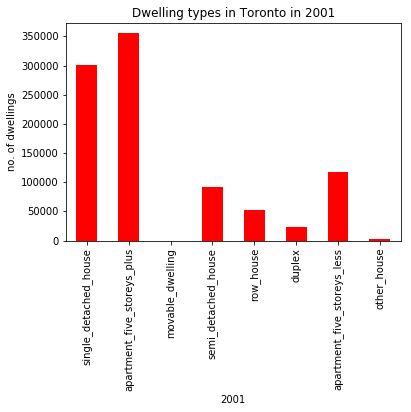

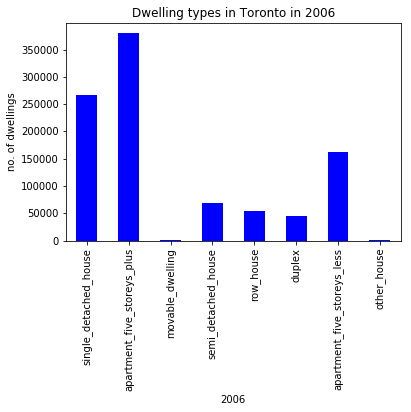

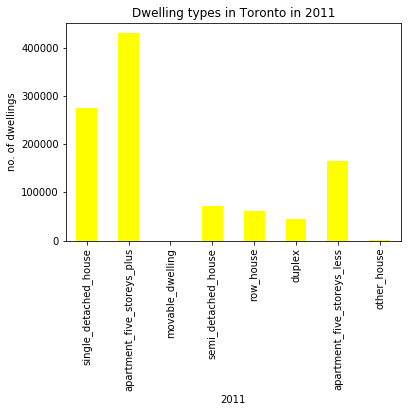

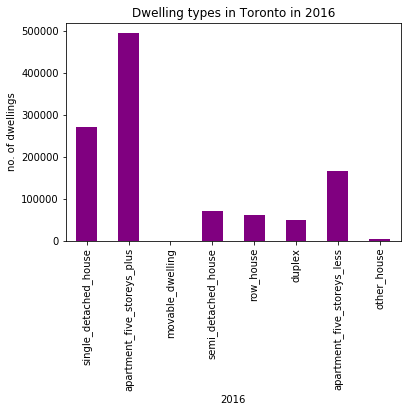

In [252]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
# YOUR CODE HERE!
create_bar_chart(2001, "red")


# Bar chart for 2006
# YOUR CODE HERE!
create_bar_chart(2006, "blue")

# Bar chart for 2011
# YOUR CODE HERE!
create_bar_chart(2011, "yellow")


# Bar chart for 2016
# YOUR CODE HERE!
create_bar_chart(2016, "purple")


- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [253]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!
shelter_costs = to_data[["shelter_costs_owned", "shelter_costs_rented"]]

shelter_costs = shelter_costs.groupby("year").mean().sort_values("year")

shelter_costs

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [254]:
# Helper create_line_chart function
#def create_line_chart(data, title, xlabel, ylabel, color):
#simplified
def create_line_chart(data, title, color):
    fig = plt.figure()
    shelter_costs[data].plot.line(
        title = f"Average Monthly Shelter Cost for {title} Dwellings in Toronto",
        xlabel = "Year",
        ylabel = "Avg Monthly Shelter Costs",
        color = color)
    plt.show()
    plt.close(fig)


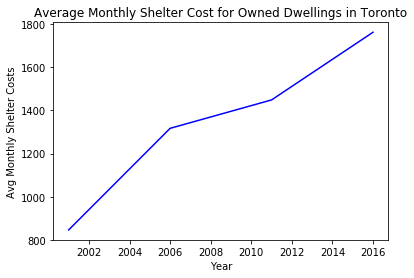

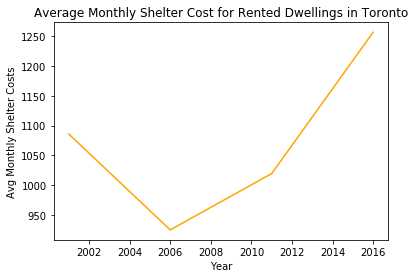

In [255]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
# YOUR CODE HERE!
create_line_chart("shelter_costs_owned", "Owned", "blue")


# Line chart for rented dwellings
# YOUR CODE HERE!
create_line_chart("shelter_costs_rented", "Rented", "orange")

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [256]:
# Calculate the average house value per year
# YOUR CODE HERE!
avg_house_value = to_data[["average_house_value"]]
avg_house_value = avg_house_value.groupby("year").mean()
avg_house_value

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


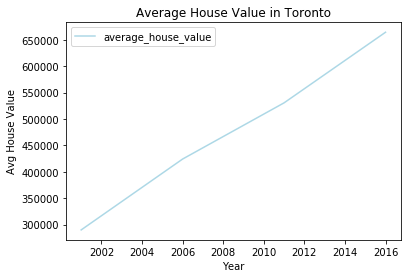

In [257]:
# Plot the average house value per year as a line chart
# YOUR CODE HERE!
avg_house_value.plot.line(
    title = "Average House Value in Toronto",
    xlabel = "Year",
    ylabel = "Avg House Value",
    color = "lightblue")


- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [258]:
# Create a new DataFrame with the mean house values by neighbourhood per year
# YOUR CODE HERE!
mean_house_value = to_data[["neighbourhood","average_house_value"]]
mean_house_value= mean_house_value.groupby(["year", "neighbourhood"]).mean()
mean_house_value.reset_index(inplace=True)
mean_house_value

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388.0
1,2001,Agincourt South-Malvern West,203047.0
2,2001,Alderwood,259998.0
3,2001,Annex,453850.0
4,2001,Banbury-Don Mills,371864.0
...,...,...,...
555,2016,Wychwood,787760.0
556,2016,Yonge-Eglinton,1127052.0
557,2016,Yonge-St.Clair,1131888.0
558,2016,York University Heights,425769.0


In [259]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!
mean_house_value.hvplot.line(
    x="year", 
    y="average_house_value",                               
    xlabel = "Year", 
    ylabel= "Mean House Value", 
    groupby= "neighbourhood").opts(yformatter="%.0f"
)

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [260]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE!
dwelling_types = to_data[["neighbourhood", "single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"]]
dwelling_types.reset_index(inplace=True)
dwelling_types.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2,2001,Alderwood,3175,315,0,470,50,185,370,0
3,2001,Annex,1060,6090,5,1980,605,275,3710,165
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0


In [261]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!
columns = ["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house",
           "row_house", "duplex", "apartment_five_storeys_less", "other_house"]

dwelling_types.hvplot.bar(
    height=500, 
    x="year", 
    y=columns, 
    xlabel = "Year & Dwelling Type",
    ylabel= "Avg no. of Dwelling Types", 
    groupby= "neighbourhood",
    rot=90
)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [262]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
values_sorted = to_data.groupby("neighbourhood").mean().sort_values("average_house_value", ascending=False)
values_sorted.reset_index(inplace=True)

top_expensive = values_sorted.iloc[0:10,:]
top_expensive

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
1,Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
2,Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
3,Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
4,St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
5,Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
6,Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
7,Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
8,Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00
9,Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.5,1308.75,6.25,813220.25,1680.75,1369.00


In [263]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
top_expensive.hvplot.bar(
    height=500,                               
    x="neighbourhood", 
    y="average_house_value",
    xlabel = "Neighbourhoods",
    ylabel= "Avg House Value",
    title = "Top 10 Expensive Neighbourhoods in Toronto", 
    rot=90).opts(yformatter="%.0f")

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [264]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [265]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
avg_neighbourhood = to_data.groupby("neighbourhood").mean()
avg_neighbourhood.reset_index(inplace=True)
avg_neighbourhood

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
136,Yonge-Eglinton,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
137,Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00
138,York University Heights,1355.00,5165.00,1.25,1316.25,662.50,188.75,1085.00,33.75,305899.50,1116.75,937.50


In [266]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!
neighbourhood_join = df_neighbourhood_locations.merge(avg_neighbourhood)
neighbourhood_join.dropna()
neighbourhood_join

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,43.676919,-79.425515,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
136,Yonge-Eglinton,43.704689,-79.403590,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
137,Yonge-St.Clair,43.687859,-79.397871,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00
138,York University Heights,43.765736,-79.488883,1355.00,5165.00,1.25,1316.25,662.50,188.75,1085.00,33.75,305899.50,1116.75,937.50


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

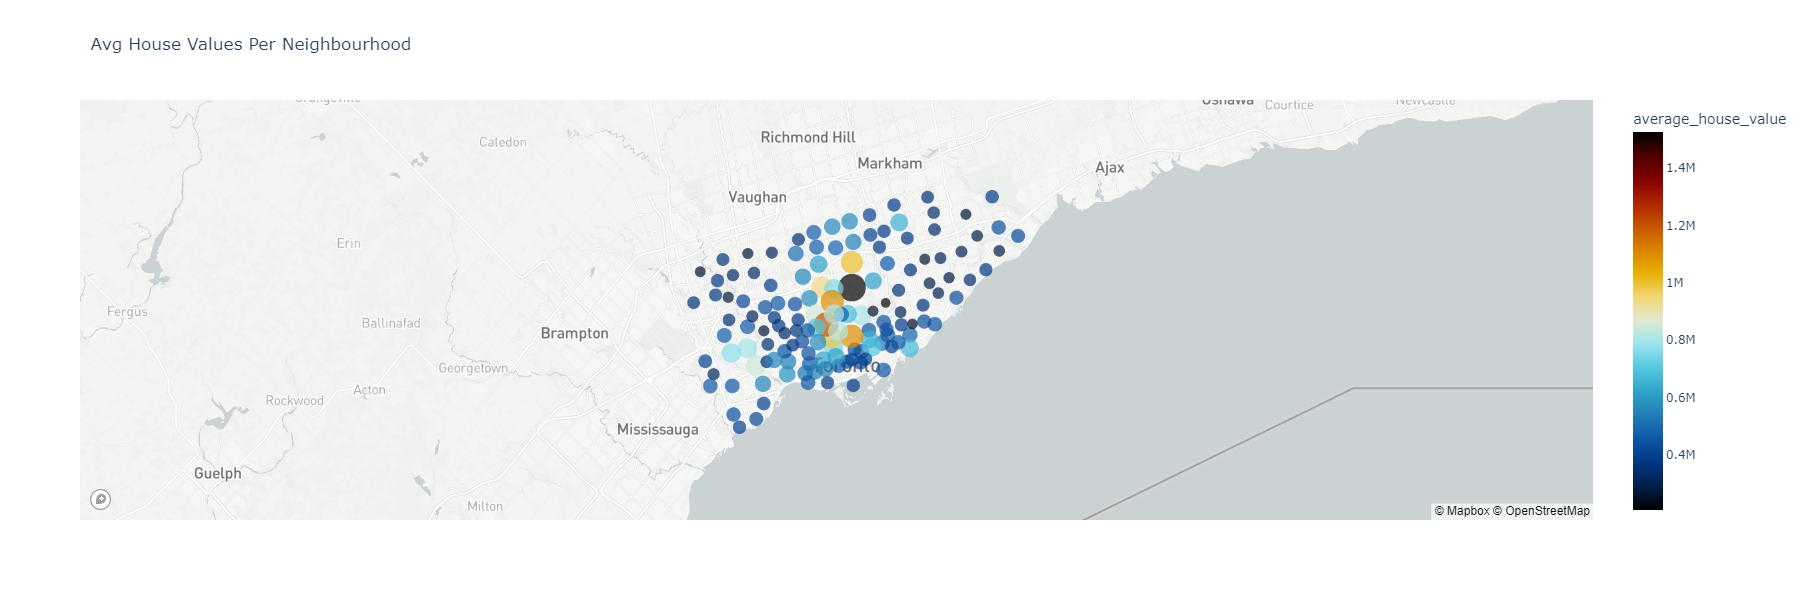

In [268]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!
px.set_mapbox_access_token(map_box_api)

avg_val_map = px.scatter_mapbox(
    neighbourhood_join,
    lat="lat",
    lon="lon",
    color="average_house_value",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=9,
    title="Avg House Values Per Neighbourhood",
    size="average_house_value",
    height=600,
    width=1000
)
avg_val_map.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

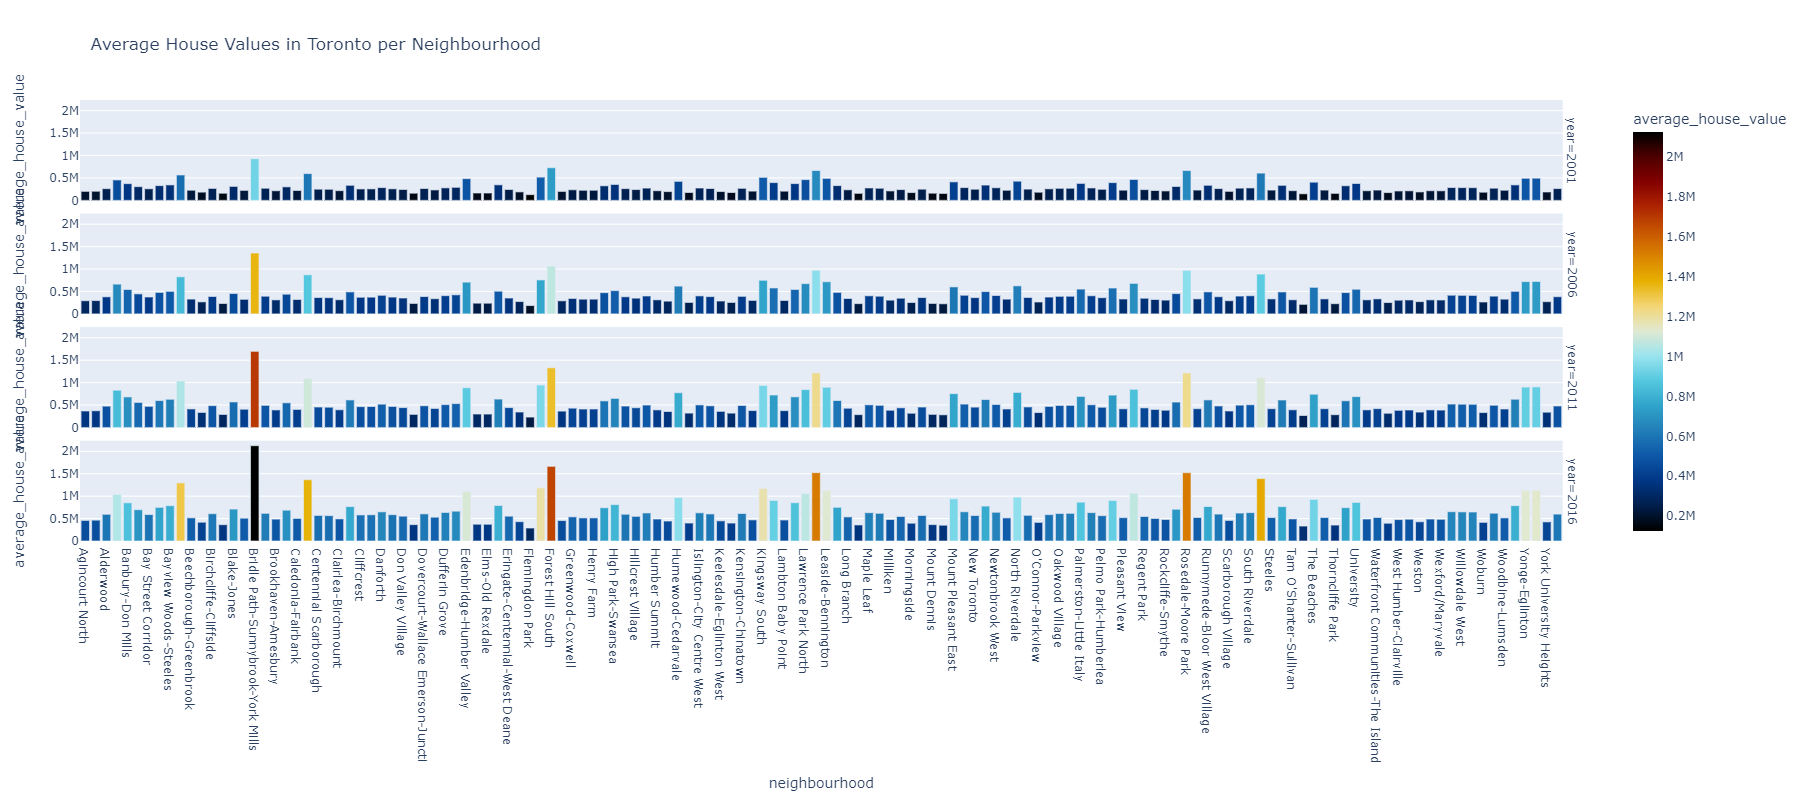

In [270]:
# YOUR CODE HERE!
mean_house_value

avg_house_values = px.bar(
    mean_house_value,
    x="neighbourhood",
    y="average_house_value",
    color="average_house_value",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="Average House Values in Toronto per Neighbourhood",
    facet_row="year",
    height=800
)
avg_house_values.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [274]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!
top_exp_neighbourhoods= mean_house_value.nlargest(40, "average_house_value")
top_exp_neighbourhoods

,year,neighbourhood,average_house_value
436,2016,Bridle Path-Sunnybrook-York Mills,2124653.0
296,2011,Bridle Path-Sunnybrook-York Mills,1697067.0
464,2016,Forest Hill South,1664653.0
489,2016,Lawrence Park South,1522732.0
524,2016,Rosedale-Moore Park,1522193.0
531,2016,St.Andrew-Windfields,1390616.0
441,2016,Casa Loma,1365503.0
156,2006,Bridle Path-Sunnybrook-York Mills,1356757.0
324,2011,Forest Hill South,1329642.0
429,2016,Bedford Park-Nortown,1295007.0


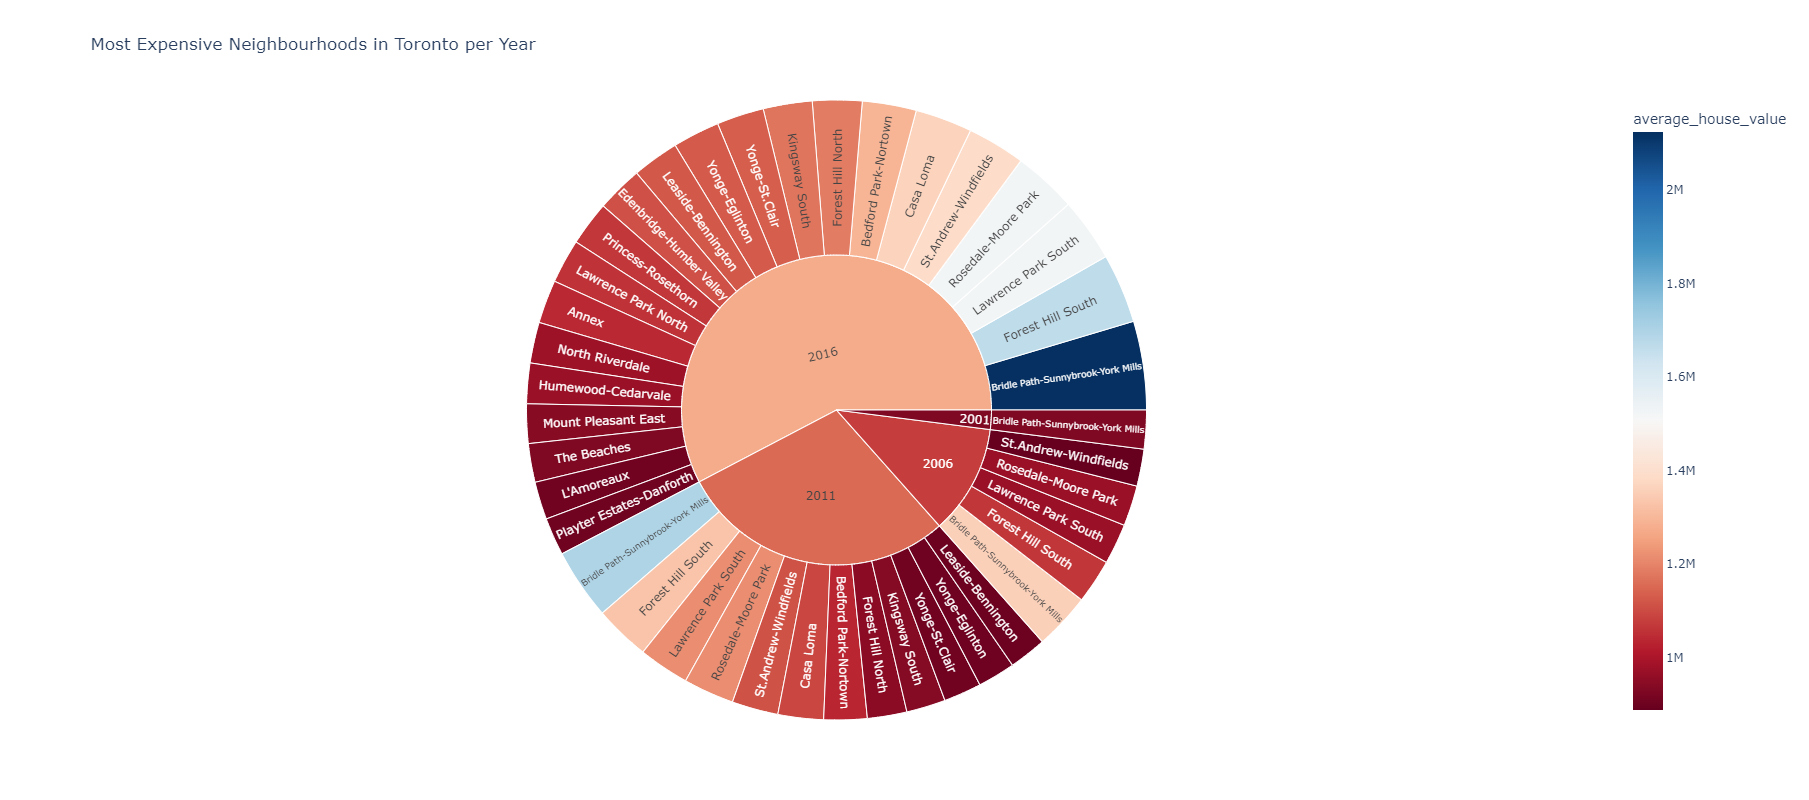

In [277]:
# Create the sunburst chart
# YOUR CODE HERE!
sun =px.sunburst(
    top_exp_neighbourhoods,
    title= "Most Expensive Neighbourhoods in Toronto per Year",
    path=["year", "neighbourhood"], 
    values="average_house_value",
    color="average_house_value",
    color_continuous_scale="RdBu",
    names="neighbourhood",
    width=800,
    height=800
)

sun.show()